https://www.kaggle.com/kyleboone/naive-benchmark-galactic-vs-extragalactic

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
meta_data = pd.read_csv('../input/training_set_metadata.csv')
test_meta_data = pd.read_csv('../input/test_set_metadata.csv')

In [4]:
targets = np.hstack([np.unique(meta_data['target']), [99]])
target_map = {j:i for i, j in enumerate(targets)}
target_ids = [target_map[i] for i in meta_data['target']]
meta_data['target_id'] = target_ids

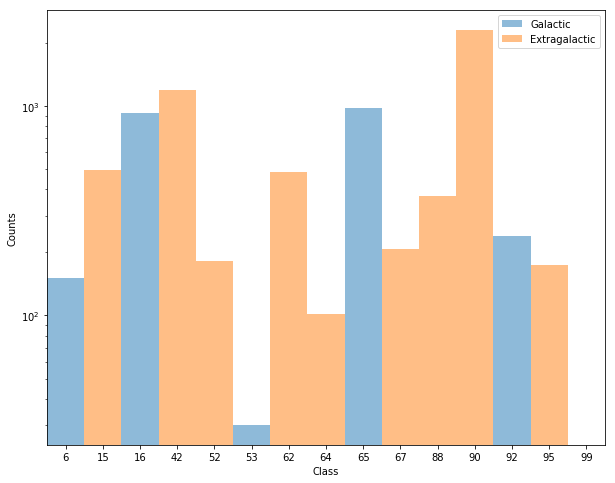

In [5]:
galactic_cut = meta_data['hostgal_specz'] == 0
plt.figure(figsize=(10, 8))
plt.hist(meta_data[galactic_cut]['target_id'], 15, (0, 15), alpha=0.5, label='Galactic')
plt.hist(meta_data[~galactic_cut]['target_id'], 15, (0, 15), alpha=0.5, label='Extragalactic')
plt.xticks(np.arange(15)+0.5, targets)
plt.gca().set_yscale("log")
plt.xlabel('Class')
plt.ylabel('Counts')
plt.xlim(0, 15)
plt.legend();

In [6]:
# Build the flat probability arrays for both the galactic and extragalactic groups
galactic_cut = meta_data['hostgal_specz'] == 0
galactic_data = meta_data[galactic_cut]
extragalactic_data = meta_data[~galactic_cut]

galactic_classes = np.unique(galactic_data['target_id'])
extragalactic_classes = np.unique(extragalactic_data['target_id'])

# Add class 99 (id=14) to both groups.
galactic_classes = np.append(galactic_classes, 14)
extragalactic_classes = np.append(extragalactic_classes, 14)

galactic_probabilities = np.zeros(15)
galactic_probabilities[galactic_classes] = 1. / len(galactic_classes)
extragalactic_probabilities = np.zeros(15)
extragalactic_probabilities[extragalactic_classes] = 1. / len(extragalactic_classes)

In [7]:
# Apply this prediction to a table
import tqdm
def do_prediction(table):
    probs = []
    for index, row in tqdm.tqdm(table.iterrows(), total=len(table)):
        if row['hostgal_photoz'] == 0:
            prob = galactic_probabilities
        else:
            prob = extragalactic_probabilities
        probs.append(prob)
    return np.array(probs)

pred = do_prediction(meta_data)
test_pred = do_prediction(test_meta_data)

100%|██████████| 3492890/3492890 [01:37<00:00, 35844.29it/s]


In [8]:
test_df = pd.DataFrame(index=test_meta_data['object_id'], data=test_pred, columns=['class_%d' % i for i in targets])
test_df.to_csv('./naive_benchmark.csv')